# Data Science - Gráfico com dados do World Bank
## Nikolas Rodrigues Moura dos Santos - RM:551566

## Passo 1: Fazendo importações da biblioteca e da base de dados

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Importe os dados do arquivo Excel para um DataFrame do Pandas
df = pd.read_excel('P_Data_Extract_From_Food_Prices_for_Nutrition.xlsx')

# Remova linhas com dados faltantes
df = df.dropna()

df.head()

,Classification Name,Classification Code,Country Name,Country Code,Time,Time Code,Cost of an energy sufficient diet [CoCA],Cost of a nutrient adequate diet [CoNA],Cost of a healthy diet [CoHD],Cost of a healthy diet relative to the cost of sufficient energy from starchy staples [CoHD_CoCA],...,Affordability of an energy sufficient diet: ratio of cost to food expenditures [CoCA_fexp],Affordability of a nutrient adequate diet: ratio of cost to food expenditures [CoNA_fexp],Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp],Percent of the population who cannot afford sufficient calories [CoCA_headcount],Percent of the population who cannot afford nutrient adequacy [CoNA_headcount],Percent of the population who cannot afford a healthy diet [CoHD_headcount],Millions of people who cannot afford sufficient calories [CoCA_unafford_n],Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n],Millions of people who cannot afford a healthy diet [CoHD_unafford_n],Population [Pop]
0,Food Prices for Nutrition 2.1,FPN 2.1,Albania,ALB,2017.0,YR2017,0.725,2.471,3.952,5.45,...,0.078,0.266,0.425,0,8.9,31.3,0,0.3,0.9,2873457
1,Food Prices for Nutrition 2.1,FPN 2.1,Albania,ALB,2018.0,YR2018,..,..,4.069,..,...,..,..,..,..,..,23,..,..,0.7,2866376
2,Food Prices for Nutrition 2.1,FPN 2.1,Albania,ALB,2019.0,YR2019,..,..,4.262,..,...,..,..,..,..,..,22.2,..,..,0.6,2854191
3,Food Prices for Nutrition 2.1,FPN 2.1,Albania,ALB,2020.0,YR2020,..,..,4.28,..,...,..,..,..,..,..,19.9,..,..,0.6,2837849
4,Food Prices for Nutrition 2.1,FPN 2.1,Albania,ALB,2021.0,YR2021,..,..,4.388,..,...,..,..,..,..,..,15.7,..,..,0.4,2811666


## Passo 2 - Tratando dados do dataset

In [92]:
# Liste as colunas que não devem ser convertidas
exclude_columns = ['Classification Name', 'Classification Code', 'Country Name', 'Country Code', 'Time Code']

# Substitua os valores ".." por NaN para todas as colunas exceto as excluídas
df = df.replace('..', pd.NA)

# Converta todas as colunas exceto as excluídas para float
for col in df.columns:
    if col not in exclude_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].ffill()

df.dtypes

Classification Name                                                                                            object
Classification Code                                                                                            object
Country Name                                                                                                   object
Country Code                                                                                                   object
Time                                                                                                          float64
Time Code                                                                                                      object
Cost of an energy sufficient diet [CoCA]                                                                      float64
Cost of a nutrient adequate diet [CoNA]                                                                       float64
Cost of a healthy diet [CoHD]                           

# **Análise Gráfica dos Dados de Preços de Alimentos para Nutrição**

# **Gráfico de Linha:**
# Analisa a variação do custo de uma dieta saudável nos países selecionados ao longo do tempo (2017 a 2021)

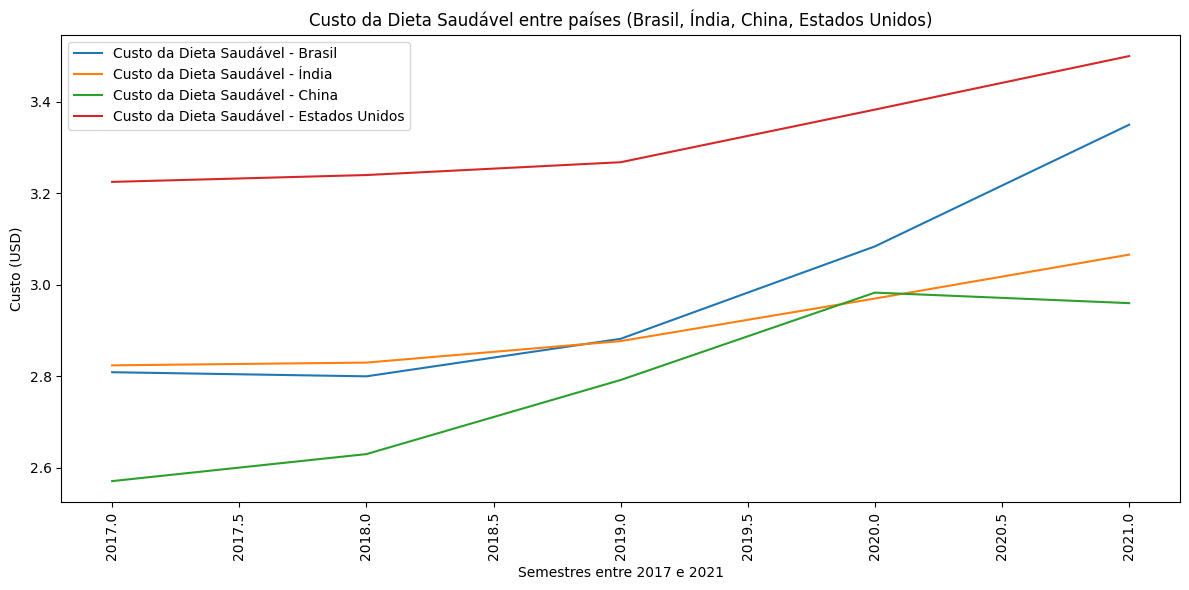

In [73]:
df_brazil = df[df['Country Name'] == 'Brazil']
df_india = df[df['Country Name'] == 'India']
df_china = df[df['Country Name'] == 'China']
df_us = df[df['Country Name'] == 'United States']

plt.figure(figsize=(12, 6))
plt.plot(df_brazil['Time'], df_brazil['Cost of a healthy diet [CoHD]'], label='Custo da Dieta Saudável - Brasil')
plt.plot(df_india['Time'], df_india['Cost of a healthy diet [CoHD]'], label='Custo da Dieta Saudável - Índia')
plt.plot(df_china['Time'], df_china['Cost of a healthy diet [CoHD]'], label='Custo da Dieta Saudável - China')
plt.plot(df_us['Time'], df_us['Cost of a healthy diet [CoHD]'], label='Custo da Dieta Saudável - Estados Unidos')
plt.xlabel('Semestres entre 2017 e 2021')
plt.ylabel('Custo (USD)')
plt.title('Custo da Dieta Saudável entre países (Brasil, Índia, China, Estados Unidos)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# **Gráfico de Barras:**
# Compara o custo de uma dieta saudável (CoHD) entre os países em 2021 e separa os 10 países com maiores CoHD.

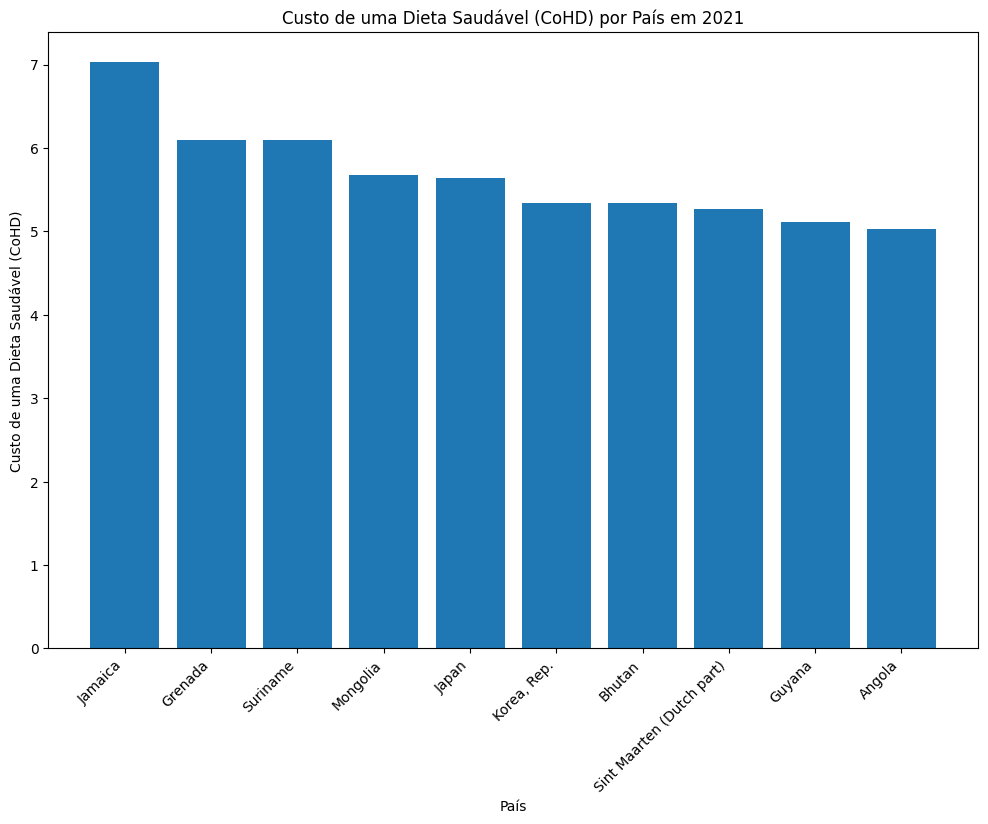

In [35]:
df_2021 = df[df["Time"] == 2021]
df_2021_ordenado = df_2021.sort_values("Cost of a healthy diet [CoHD]", ascending=False)

# Exibir apenas os 10 países com maior custo de dieta saudável
top_10_paises = df_2021_ordenado.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_10_paises["Country Name"], top_10_paises["Cost of a healthy diet [CoHD]"])
plt.xlabel("País")
plt.ylabel("Custo de uma Dieta Saudável (CoHD)")
plt.title("Custo de uma Dieta Saudável (CoHD) por País em 2021")
plt.xticks(rotation=45, ha="right")
plt.show()

# **Histograma:**
# Analisa a Distribuição do Custo da Dieta Saudável em 2021.

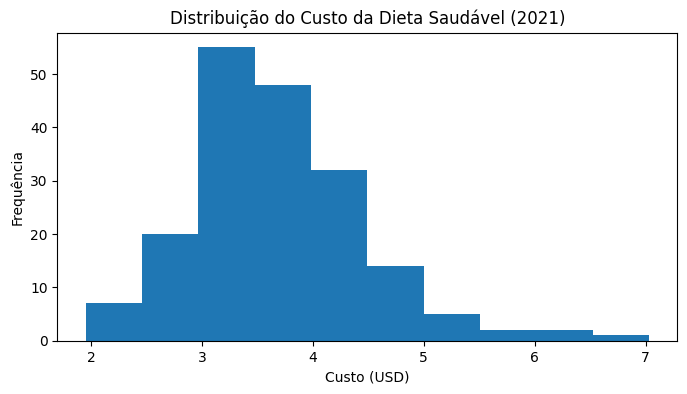

In [74]:
plt.figure(figsize=(8, 4))
plt.hist(df_2021['Cost of a healthy diet [CoHD]'], bins=10)
plt.xlabel('Custo (USD)')
plt.ylabel('Frequência')
plt.title('Distribuição do Custo da Dieta Saudável (2021)')
plt.show()


# **Gráfico de Pizza:**
# Mostra a proporção da participação de cada grupo alimentar na composição de uma dieta saudável em 2021, para o Brasil.

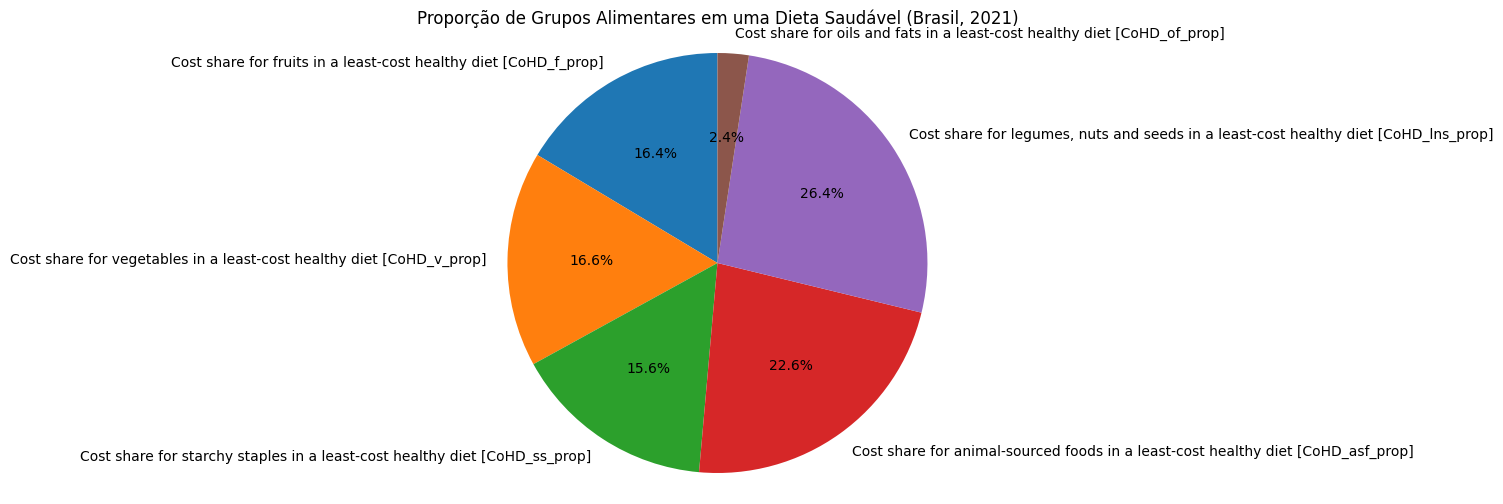

In [54]:
df_brazil_2021 = df[(df["Country Name"] == "Brazil") & (df["Time"] == 2021)]
food_groups = ["Cost share for fruits in a least-cost healthy diet [CoHD_f_prop]", "Cost share for vegetables in a least-cost healthy diet [CoHD_v_prop]", "Cost share for starchy staples in a least-cost healthy diet [CoHD_ss_prop]", "Cost share for animal-sourced foods in a least-cost healthy diet [CoHD_asf_prop]", "Cost share for legumes, nuts and seeds in a least-cost healthy diet [CoHD_lns_prop]", "Cost share for oils and fats in a least-cost healthy diet [CoHD_of_prop]"]

# Extrair os valores das colunas de grupos alimentares para o Brasil em 2021
values = df_brazil_2021[food_groups].iloc[0].values

# Plotar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(values, labels=food_groups, autopct="%1.1f%%", startangle=90)
plt.axis("equal")
plt.title("Proporção de Grupos Alimentares em uma Dieta Saudável (Brasil, 2021)")
plt.show()

# **Gráfico de Dispersão:**
# Analisa a relação entre o custo de uma dieta saudável (CoHD) e a porcentagem da população que não pode pagar uma dieta saudável em 2021.

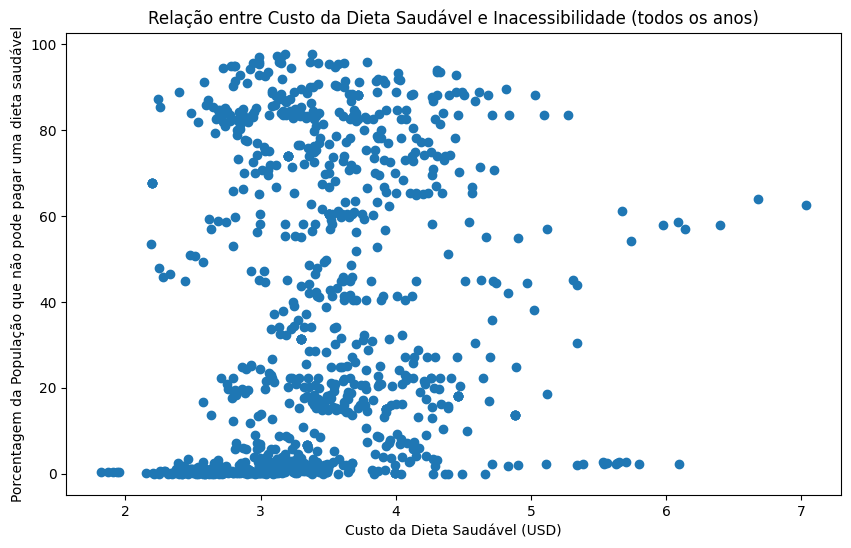

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cost of a healthy diet [CoHD]'], df['Percent of the population who cannot afford a healthy diet [CoHD_headcount]'])
plt.xlabel('Custo da Dieta Saudável (USD)')
plt.ylabel('Porcentagem da População que não pode pagar uma dieta saudável')
plt.title('Relação entre Custo da Dieta Saudável e Inacessibilidade (todos os anos)')
plt.show()